In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_new.csv to data_new.csv


In [ ]:
# Read csv file with EEG data
df = pd.read_csv('data_new.csv')

In [ ]:
# Drop columns without EEG Data
X = pd.get_dummies(df.drop(['y', 'Patient ID'], axis=1))

# Each patient's y-value is 1 only if they experienced a seizure
y = df['y'].apply(lambda x: 1 if x==1 else 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
y_train.head()

640      0
9367     0
4799     1
10863    1
9837     0
Name: y, dtype: int64

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [ ]:
# Fit model and use it to make predictions
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

In [ ]:
model.fit(X_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
288/288 [==============================] - 1s 3ms/step - loss: 0.0052 - accuracy: 0.9997
Epoch 2/200
288/288 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9997
Epoch 3/200
288/288 [==============================] - 1s 3ms/step - loss: 0.0052 - accuracy: 0.9997
Epoch 4/200
288/288 [==============================] - 2s 6ms/step - loss: 0.0052 - accuracy: 0.9997
Epoch 5/200
288/288 [==============================] - 2s 6ms/step - loss: 0.0051 - accuracy: 0.9997
Epoch 6/200
288/288 [==============================] - 1s 3ms/step - loss: 0.0051 - accuracy: 0.9997
Epoch 7/200
288/288 [==============================] - 1s 3ms/step - loss: 0.0051 - accuracy: 0.9997
Epoch 8/200
288/288 [==============================] - 1s 4ms/step - loss: 0.0051 - accuracy: 0.9997
Epoch 9/200
288/288 [==============================] - 1s 4ms/step - loss: 0.0051 - accuracy: 0.9997
Epoch 10/200
288/288 [==============================] - 1s 4ms/step - loss: 0.0051 - accura

In [ ]:
# Predict the probabilities for the testing set for later use for the ROC curve
y_score = model.predict(X_test)

# Record predicted y-values
y_hat = y_score
# Turn continuous values into binary ones
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

print(y_hat)

72/72 [==============================] - 0s 4ms/step
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1

In [ ]:
from sklearn import metrics

In [ ]:
# Create confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_hat)

In [ ]:
# Configure consuion matrix into a more readable form
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['No Seizure', 'Seizure'])

In [ ]:
import matplotlib.pyplot as plt

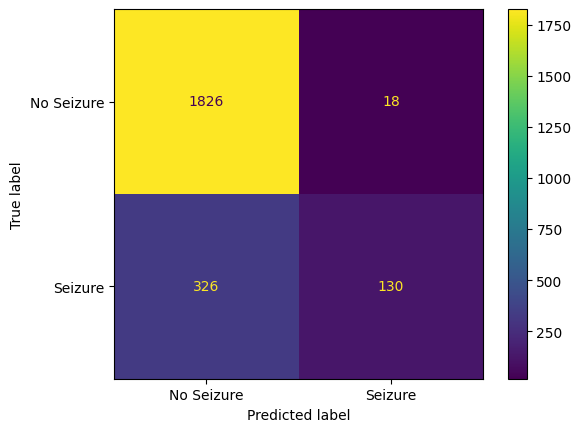

In [ ]:
cm_display.plot()
plt.show()

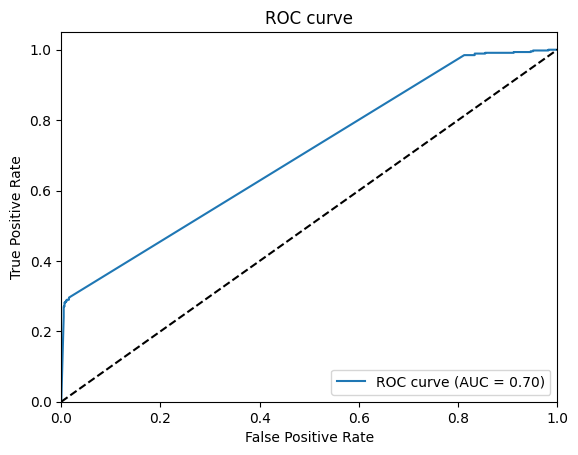

In [ ]:
# y_test: actual labels of the testing set
# y_score: predicted scores of the testing set (e.g., probabilities)

# Compute fpr, tpr, and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)

# Compute AUC score
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()